In [21]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

## Dataset Preparation

In [22]:
# Load the sklearn MNIST Dataset
digits = load_digits()

In [23]:
X = digits.data # data gives the x values
Y = digits.target # target gives the y values

In [24]:
print(X.shape) # Each image has 64 features and there are 1797 examples
# This shows that each image is 8x8 image

(1797, 64)


In [25]:
print(Y.shape)

(1797,)


## Visualization

0


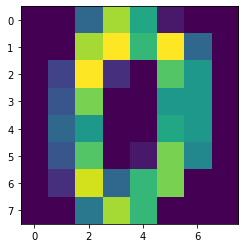

In [26]:
plt.imshow(X[0].reshape((8,8)))
print(Y[0])
plt.show()

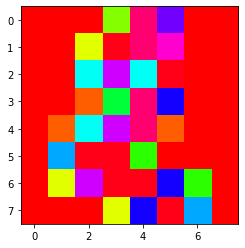

2


In [32]:
plt.imshow(X[2].reshape(8,8),cmap='hsv')
plt.show()
print(Y[2])

1


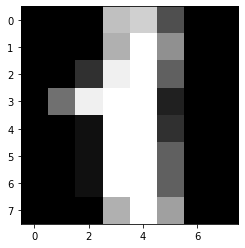

In [33]:
plt.imshow(X[1].reshape((8,8)), cmap='gray')
print(Y[1])
plt.show()

In [36]:
print(X[0]) # Grayscale image has 1 channel from 0 to 15
# RGB Image has 3 channels from 0 to 255

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [37]:
# SO, it would be good to apply Multinomial Naive Bayes as compared to Gaussian Naive Bayes as the values are not continuous.

## Train Models

In [38]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [39]:
mnb = MultinomialNB()
gnb = GaussianNB()

## Training

In [41]:
mnb.fit(X,Y)
gnb.fit(X,Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [42]:
mnb.score(X,Y)

0.9053978853644964

In [43]:
gnb.score(X,Y)

0.8580968280467446

In [44]:
# SO, Multinomial Naive Bayes as we expected is giving a higher accuracy than Gaussian Naive Bayes

In [45]:
# This is because mnb assumes the features are discrete whereas gnb assumes them to be continuous and modeled by a Gaussian Distribution.

In [46]:
cross_val_score(gnb,X,Y,scoring="accuracy",cv=10)

array([0.76756757, 0.81967213, 0.89502762, 0.71111111, 0.72625698,
       0.84357542, 0.8547486 , 0.86516854, 0.8079096 , 0.8125    ])

In [47]:
cross_val_score(gnb,X,Y,scoring="accuracy",cv=10).mean()

0.8103537583567821

In [48]:
# Average accuracy is around 81% for Gaussian Naive Bayes

In [49]:
cross_val_score(mnb,X,Y,scoring="accuracy",cv=10).mean()

0.8819396216300838

In [50]:
# Average accuracy is around 88% for Multinomial Naive Bayes

### This is because each feature is discrete valued! Hence, MNB gives better results!